In [1]:
import pandas as pd

def read_hist_data(name = 'BTC', timeframe = '1h'):
    file_path = f"./data/{name}_USDT-{timeframe}.json"
    df = pd.read_json(file_path)

    # set column names
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']

    # convert unix timestamp to datetime
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    
    return df



## Data Exploration

In [2]:
df = read_hist_data(name = 'BTC', timeframe = '1h') # read data
# df = read_hist_data(name = 'BTC', timeframe = '5m') # read data
print(df.head(10))
print(df.tail(10)) 

             datetime      open      high       low     close       volume
0 2021-01-01 00:00:00  28923.63  29031.34  28690.17  28995.13  2311.811445
1 2021-01-01 01:00:00  28995.13  29470.00  28960.35  29409.99  5403.068471
2 2021-01-01 02:00:00  29410.00  29465.26  29120.03  29194.65  2384.231560
3 2021-01-01 03:00:00  29195.25  29367.00  29150.02  29278.40  1461.345077
4 2021-01-01 04:00:00  29278.41  29395.00  29029.40  29220.31  2038.046803
5 2021-01-01 05:00:00  29220.31  29235.28  29084.11  29187.01  1469.956262
6 2021-01-01 06:00:00  29187.01  29270.00  29077.32  29174.35  1420.726291
7 2021-01-01 07:00:00  29174.35  29191.98  28806.54  29092.83  2380.180918
8 2021-01-01 08:00:00  29092.84  29178.03  28872.24  29000.01  2008.165739
9 2021-01-01 09:00:00  29000.01  29307.73  28970.00  29202.21  2022.056022
                 datetime      open      high       low     close      volume
23121 2023-08-22 23:00:00  25808.00  26070.04  25784.69  26056.00  2291.04723
23122 2023-08-23 00

##### Summary Statistics:

In [3]:
print(df.describe())

                            datetime          open          high  \
count                          23131  23131.000000  23131.000000   
mean   2022-04-28 07:58:34.867493632  34997.550070  35179.056338   
min              2021-01-01 00:00:00  15648.230000  15769.990000   
25%              2021-08-30 09:30:00  23325.795000  23414.345000   
50%              2022-04-28 10:00:00  31778.570000  31995.000000   
75%              2022-12-25 08:30:00  45002.485000  45286.315000   
max              2023-08-23 08:00:00  68635.120000  69000.000000   
std                              NaN  13129.873926  13213.779842   

                low         close         volume  
count  23131.000000  23131.000000   23131.000000  
mean   34806.123883  34997.426010    4802.208618  
min    15476.000000  15649.520000       0.000000  
25%    23235.640000  23326.565000    1406.233285  
50%    31563.520000  31777.730000    2697.090110  
75%    44672.505000  45002.485000    5966.309079  
max    68451.190000  68633.690

##### Time Series Plot:

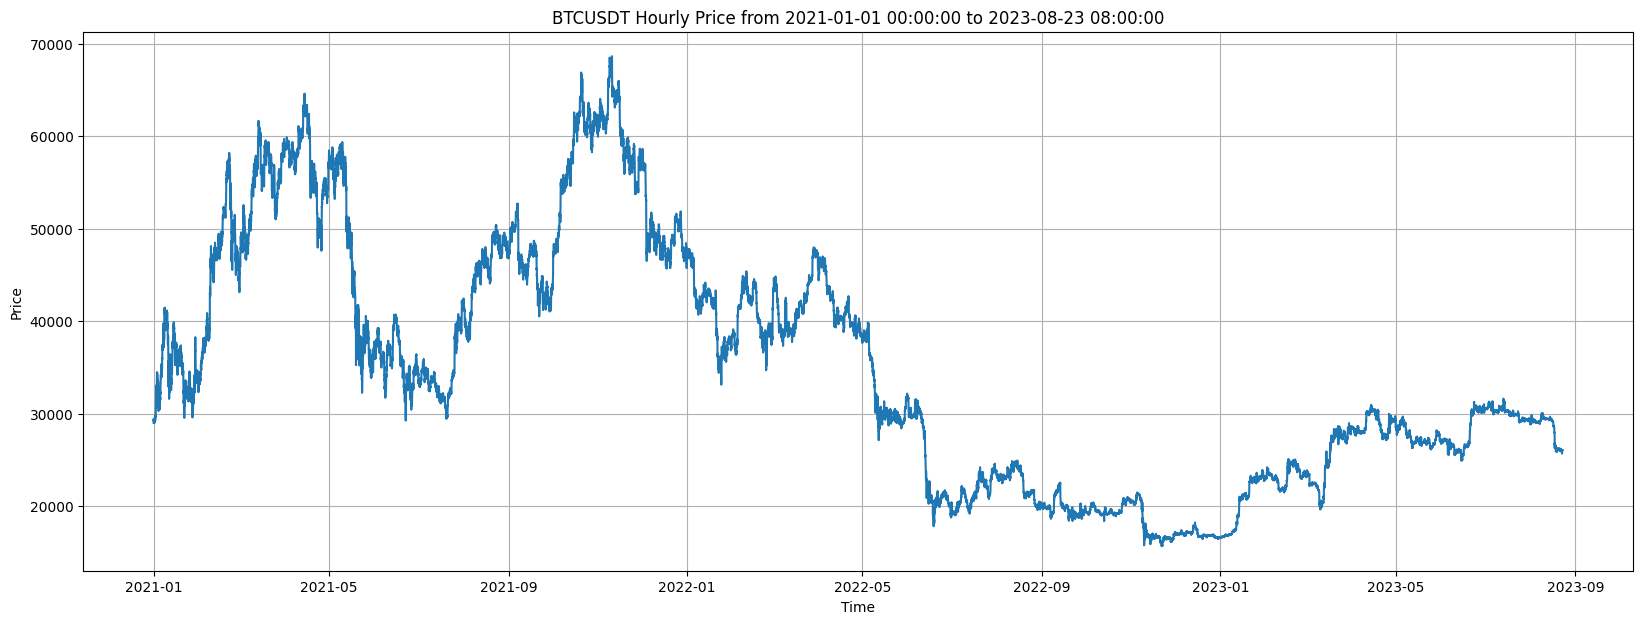

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
plt.plot(df['datetime'], df['close'])
plt.title(f'BTCUSDT Hourly Price from {df["datetime"].iloc[0]} to {df["datetime"].iloc[-1]}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()


##### Distribution of Price:

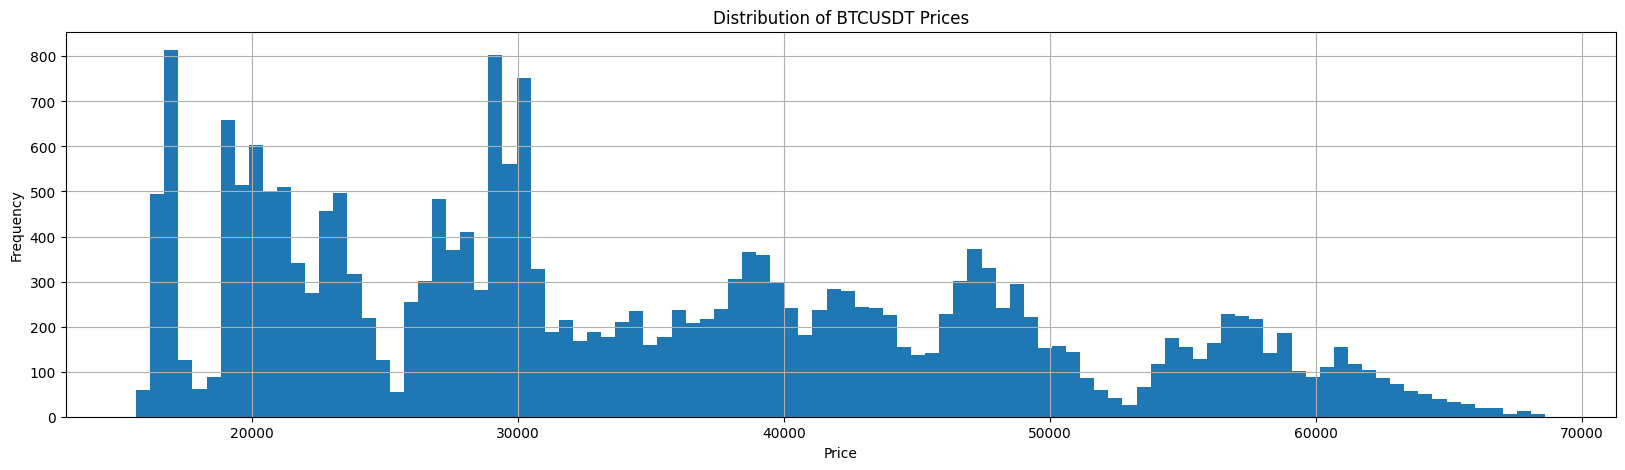

In [27]:
plt.figure(figsize=(20,5))
df['close'].hist(bins=100)
plt.title('Distribution of BTCUSDT Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


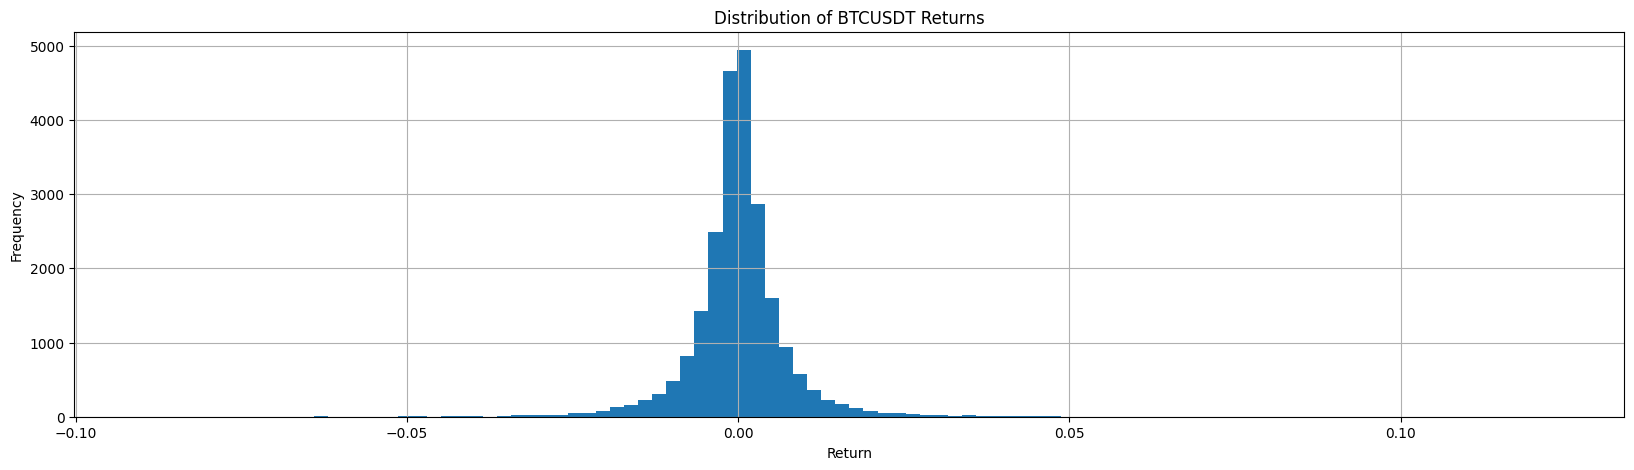

In [28]:
# distribution of returns
plt.figure(figsize=(20,5))
df['close'].pct_change().hist(bins=100)
plt.title('Distribution of BTCUSDT Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##### Boxplot:
Identify outliers

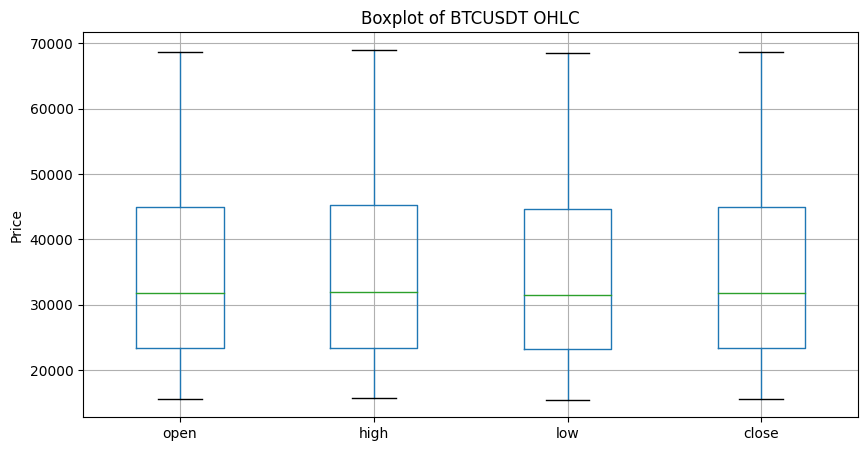

In [29]:
# boxplot open high low close
plt.figure(figsize=(10,5))
df[['open', 'high', 'low', 'close']].boxplot()
plt.title('Boxplot of BTCUSDT OHLC')
plt.ylabel('Price')
plt.grid(True)
plt.show()


##### Decomposition

Decompose the time series into trend, seasonal, and residual components.

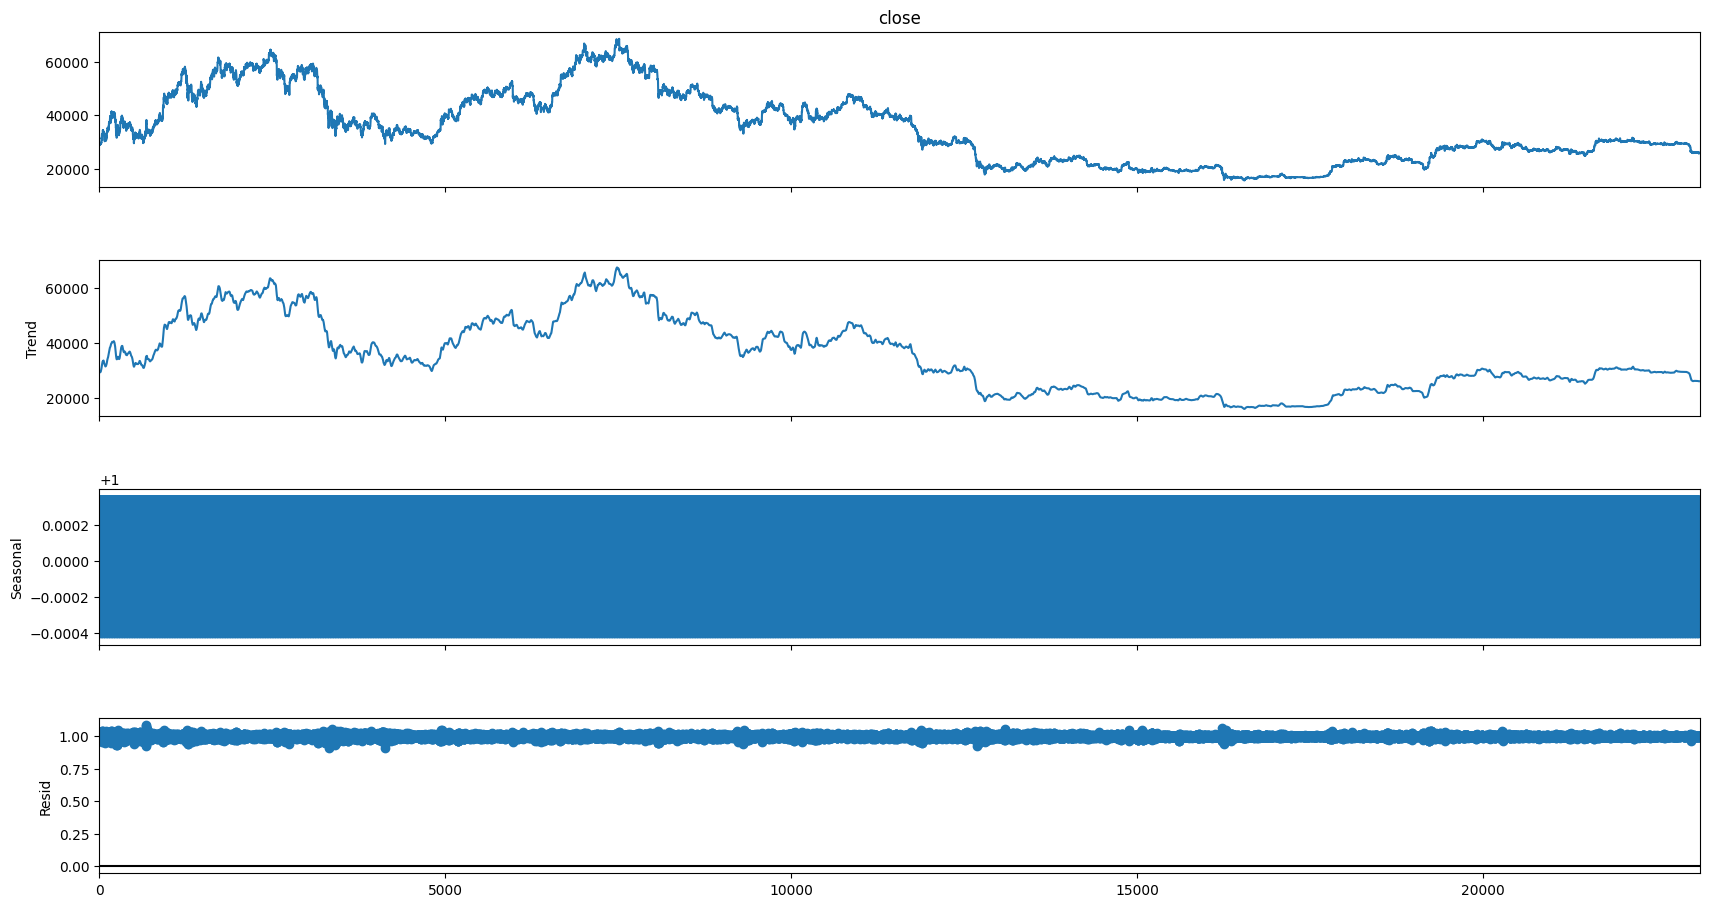

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['close'], model='multiplicative', period = 24)  # daily seasonality as data is hourly
plt = result.plot()
plt.set_size_inches(20, 10)
plt.show()
